In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import collections
from urllib.parse import urljoin
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import itertools
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/drazenzack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Functions Used

In [29]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, '', raw_html)
    return(cleantext)

tokenizer = RegexpTokenizer(r'\w+')
def token(x):
    ww = tokenizer.tokenize(x)
    return(ww)

stop = stopwords.words('english')
stop.extend(['day','ago'])
def remove_stopwords(x):
    words = [w for w in x if w not in stop]
    return(words)

lemm = WordNetLemmatizer()

def word_lem(x):
    lem_text = " ".join(lemm.lemmatize(i) for i in x)
    return(lem_text)

def plot_count(x,title):
    sns.set()
    plt.figure(figsize = (20,9))
    sns.barplot(x='ReviewText', y='count', data=x).set_title(title,fontsize=20)
    plt.xlabel('Words',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.xticks(rotation=45, fontsize = 15)
    plt.yticks(fontsize = 15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, int(height) + 3.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')
    plt.show()
        
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return(words_freq[:n])

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return(words_freq[:n])

def single_word(x, y):
    common_words = get_top_n_words(x['text'], 20)
    df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    n_words = pd.DataFrame(df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False))
    n_words.reset_index(inplace = True)
    print(n_words)
    plot_count(n_words, y)
    
def bi_word(x, y):
    common_words = get_top_n_bigram(x['text'], 20)
    df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    n_words = pd.DataFrame(df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False))
    n_words.reset_index(inplace = True)
    print(n_words)
    plot_count(n_words, y)
    

In [18]:
def getlink(url,x):
    text_list = []
    for i in range(x): 
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for c in all_matches:
            jd_url = 'http://www.indeed.com/m/'+c['href']
            response = requests.get(jd_url)
            jd_page = response.text
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']})
            text = ' '.join(map(str, jd_desc)) 
            text = cleanhtml(text)
            text = text.replace('\n','')
            text_list.append(text)
    
        url_all = soup.findAll(attrs={'rel':['next']})

        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    df = pd.DataFrame(text_list, columns = ['text'])
    df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    df['text'] = df['text'].replace('\d+', '', regex=True)
    df['text'] = df['text'].apply(token)
    df['text'] = df['text'].apply(remove_stopwords)
    df['text'] = df['text'].apply(word_lem)
    return(df)  

### Nationwide

In [15]:
df2 = getlink("https://www.indeed.com/m/jobs?q=finance+manager=",30)

[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=20" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=30" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=40" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=50" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=60" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=70" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=80" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=90" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=100" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=110" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=120" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=130" rel="next"/>]
[<link href="jobs?q=finance+manage

    ReviewText  count
0      finance   1032
1    financial    959
2     customer    842
3   experience    791
4         work    751
5     business    730
6         team    660
7   management    620
8      manager    609
9         sale    587
10     process    496
11     service    491
12       skill    487
13     ability    462
14        year    437
15     support    405
16     company    400
17  accounting    390
18   including    389
19    position    375


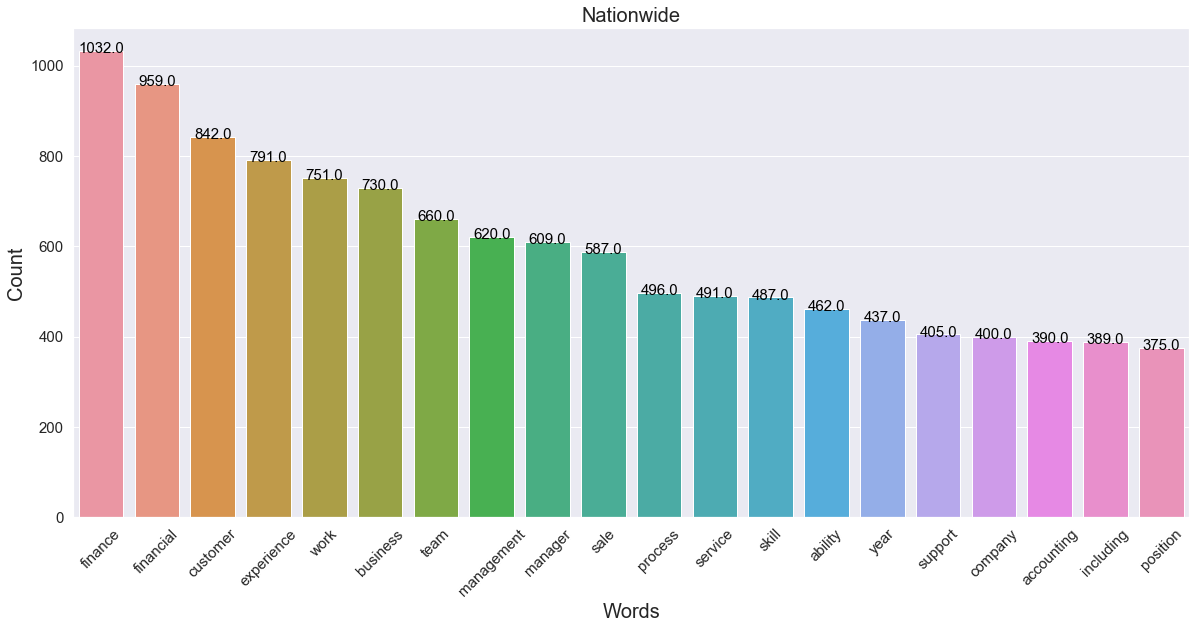

In [16]:
single_word(df2, 'Nationwide')

              ReviewText  count
0        finance manager    133
1             fi manager    121
2      equal opportunity    113
3      finance insurance    111
4   opportunity employer    107
5       customer service     95
6    communication skill     89
7        year experience     84
8          skill ability     84
9        bachelor degree     82
10    sexual orientation     73
11       national origin     68
12      policy procedure     68
13         federal state     67
14            fast paced     67
15         state federal     64
16           high school     61
17       gender identity     61
18        veteran status     60
19           state local     60


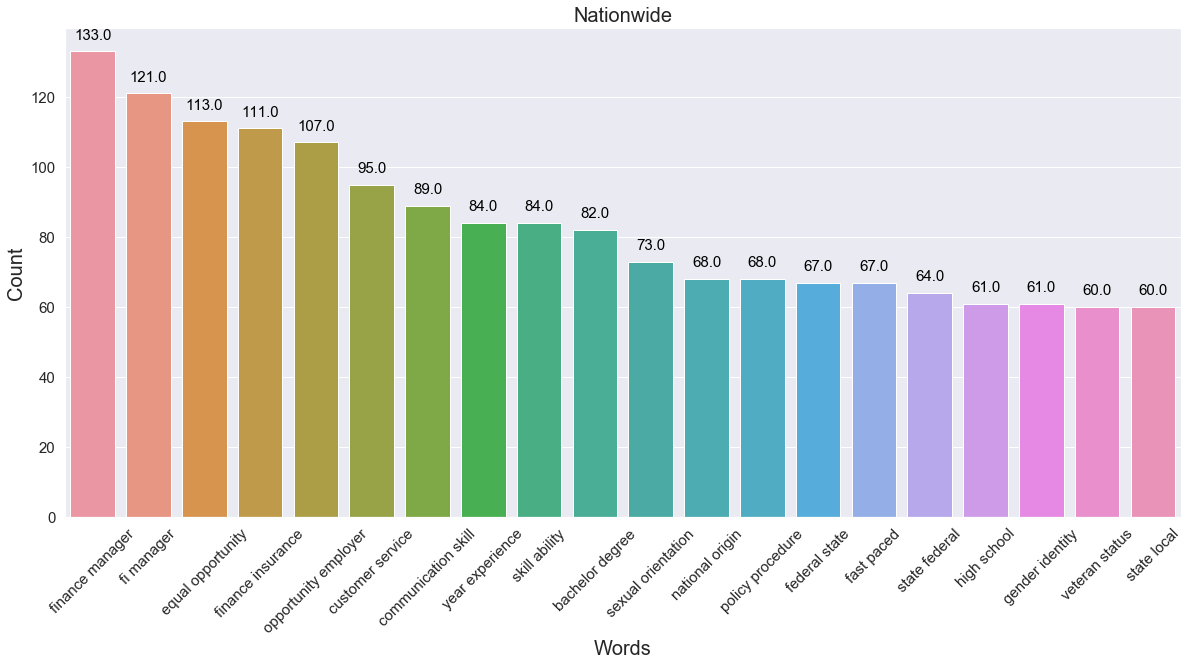

In [17]:
bi_word(df2, 'Nationwide')

### For the 6 cities 

https://www.indeed.com/m/jobs?q=finance+manager&l=Washington%2C+DC
     ReviewText  count
0     financial    619
1    experience    394
2       finance    307
3          team    270
4          work    269
5    management    265
6        client    263
7      business    261
8       manager    230
9       service    214
10      program    213
11        skill    191
12      project    182
13         year    176
14      support    176
15     customer    161
16  opportunity    159
17    including    152
18     position    152
19      ability    149


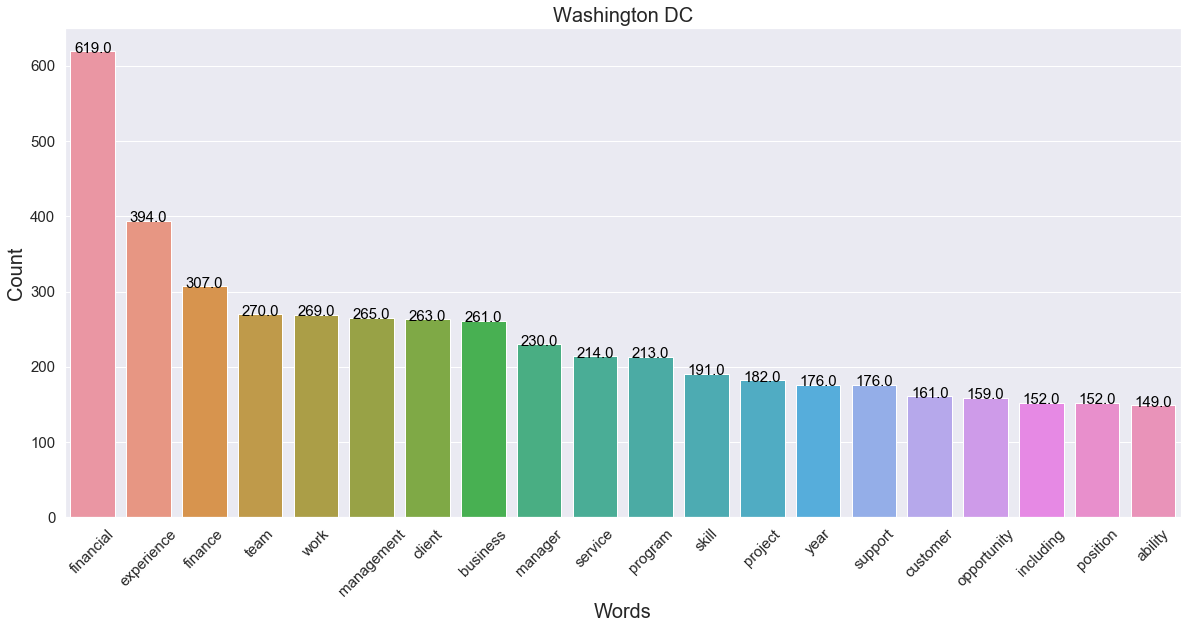

              ReviewText  count
0       financial center     91
1   financial management     47
2           bank america     45
3      financial service     43
4      equal opportunity     36
5       customer service     36
6         financial life     35
7        year experience     32
8       policy procedure     32
9   opportunity employer     31
10      client financial     31
11       finance manager     30
12             long term     28
13        center manager     28
14     assistant manager     28
15            fast paced     27
16        veteran status     25
17      center assistant     25
18       bachelor degree     25
19       national origin     24


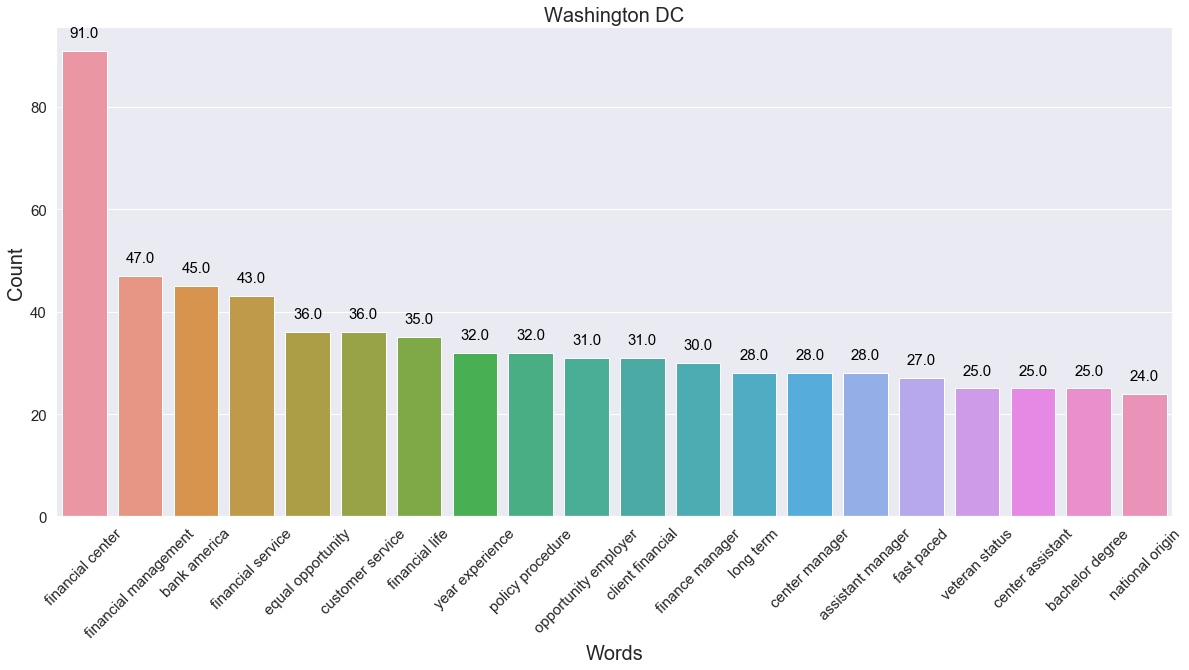

https://www.indeed.com/m/jobs?q=finance+manager&l=New+York
    ReviewText  count
0    financial    499
1     business    378
2      finance    364
3   experience    275
4         team    270
5         work    267
6   management    249
7      process    188
8     analysis    188
9      company    187
10     manager    180
11     service    176
12        year    173
13  accounting    167
14   reporting    158
15       skill    153
16   including    151
17    customer    143
18     ability    142
19     support    138


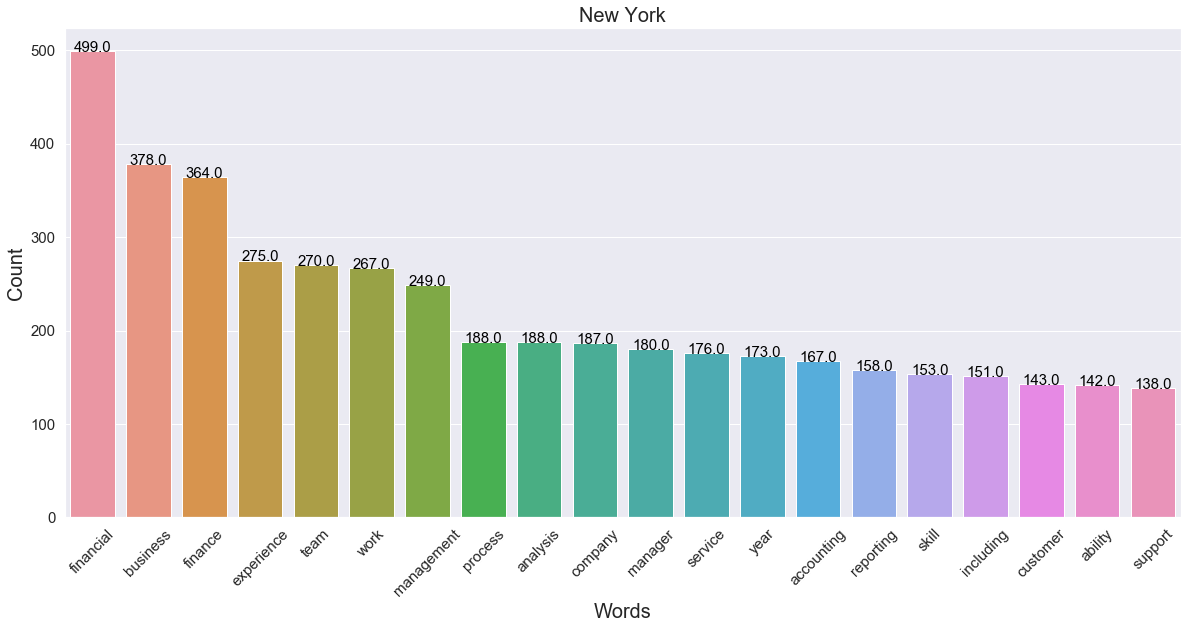

                  ReviewText  count
0                   new york     51
1                     ad hoc     48
2          equal opportunity     42
3         financial planning     38
4            year experience     38
5                 fast paced     36
6   reasonable accommodation     35
7            finance manager     35
8         sexual orientation     32
9        communication skill     32
10           national origin     31
11           gender identity     30
12         financial service     29
13         finance insurance     29
14                race color     27
15              finance team     27
16            veteran status     26
17             annual budget     26
18       financial reporting     26
19      opportunity employer     25


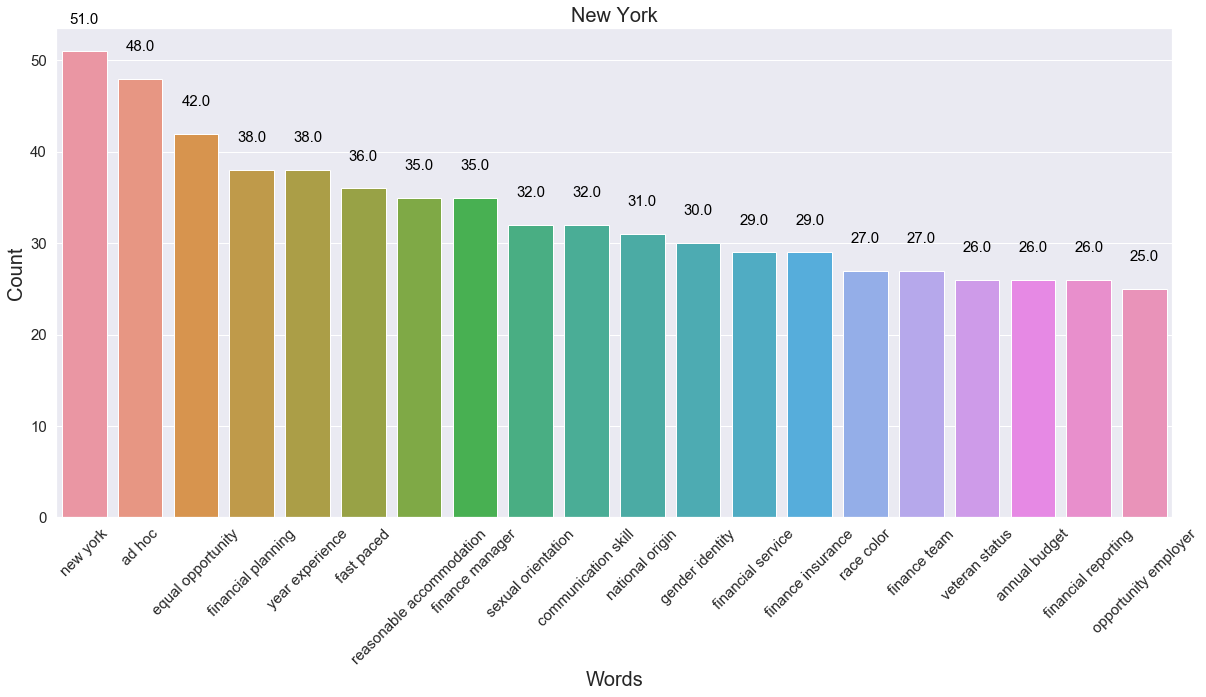

https://www.indeed.com/m/jobs?q=finance+manager&l=San+Francisco
     ReviewText  count
0     financial    761
1       finance    510
2      business    505
3          team    453
4    experience    424
5          work    406
6    management    336
7    accounting    306
8       service    265
9       process    244
10    including    234
11        skill    233
12      company    232
13     analysis    226
14         year    226
15  opportunity    223
16    reporting    209
17      support    196
18      manager    194
19      ability    191


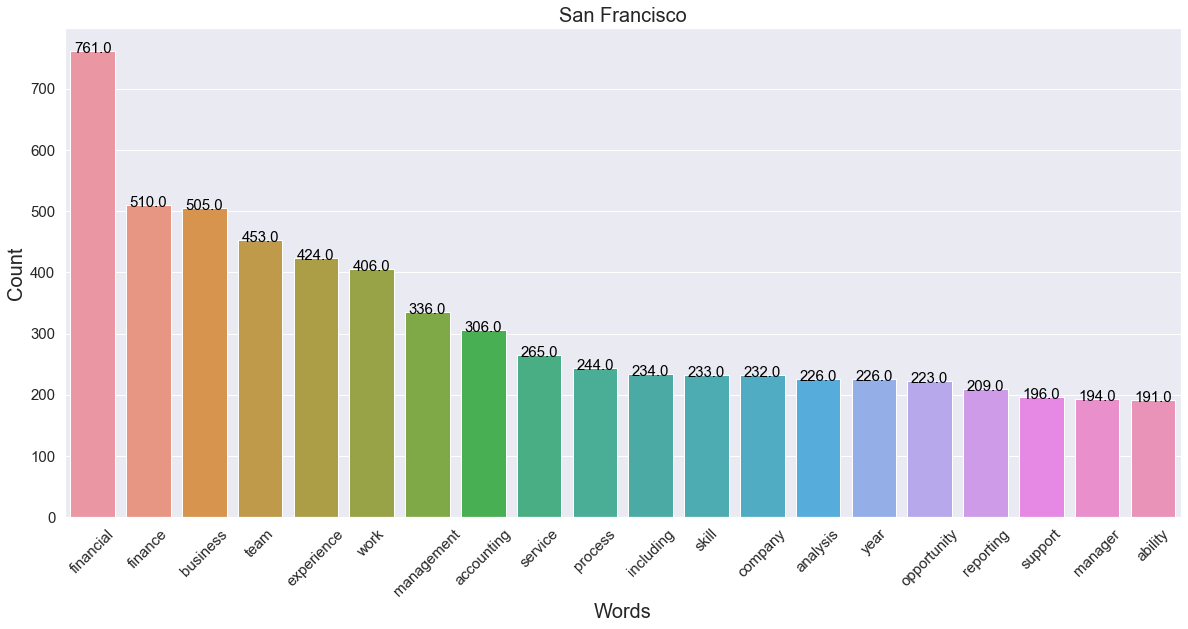

              ReviewText  count
0          san francisco    103
1      equal opportunity     58
2              long term     53
3   financial management     52
4        national origin     51
5     sexual orientation     48
6    communication skill     47
7        year experience     46
8   opportunity employer     45
9      financial service     45
10       finance manager     44
11      policy procedure     42
12    financial planning     42
13   qualified applicant     41
14          finance team     41
15      director finance     40
16   financial reporting     40
17       gender identity     39
18      business partner     38
19                ad hoc     38


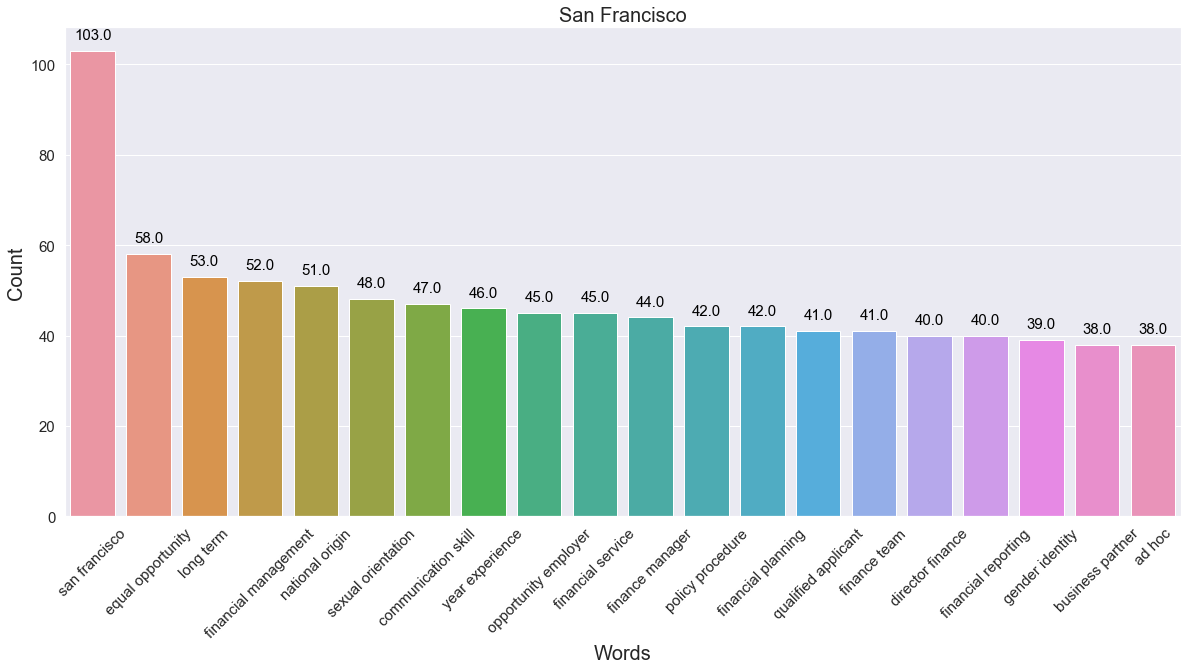

https://www.indeed.com/m/jobs?q=finance+manager&l=Chicago
     ReviewText  count
0     financial    811
1      business    692
2       finance    530
3    experience    478
4          team    447
5          work    395
6    management    392
7        client    369
8    accounting    337
9         skill    305
10     analysis    291
11      process    278
12      support    263
13      service    257
14  opportunity    256
15         year    253
16      ability    246
17    including    242
18    reporting    222
19      company    212


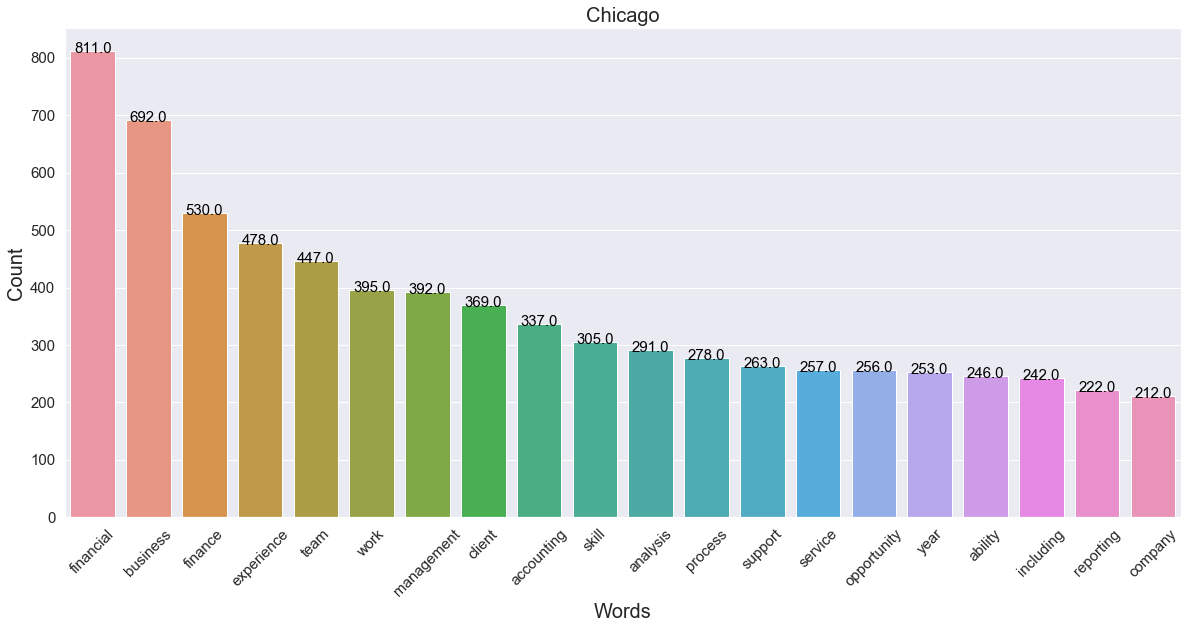

              ReviewText  count
0        year experience     88
1     finance accounting     60
2          skill ability     50
3     financial planning     49
4     sexual orientation     48
5    financial reporting     48
6     accounting finance     48
7        bachelor degree     47
8    communication skill     46
9        national origin     45
10            least year     44
11     equal opportunity     42
12    financial analysis     40
13        veteran status     40
14  opportunity employer     39
15        without regard     39
16         business unit     39
17      business partner     39
18            fast paced     38
19     financial service     37


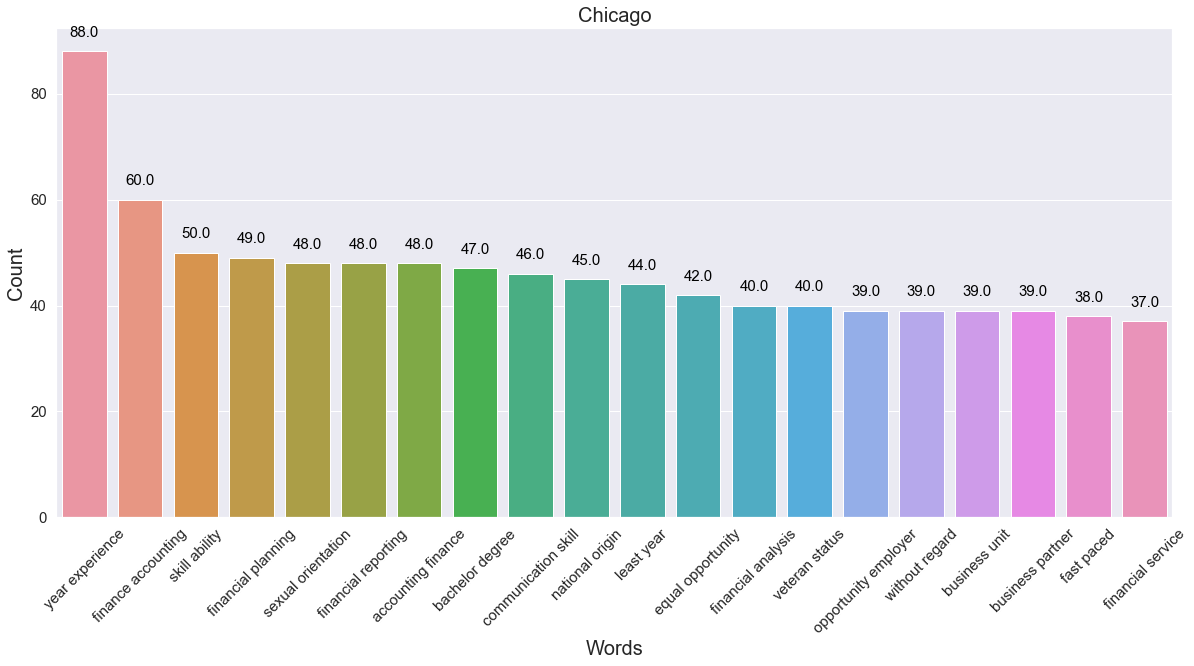

https://www.indeed.com/m/jobs?q=finance+manager&l=Philadelphia
     ReviewText  count
0     financial    455
1       finance    275
2      business    259
3    experience    229
4          work    210
5    management    194
6       service    176
7       manager    157
8          team    155
9     including    155
10         year    130
11      process    130
12        skill    128
13  opportunity    127
14       client    126
15     customer    121
16     analysis    119
17   accounting    119
18         sale    118
19      support    117


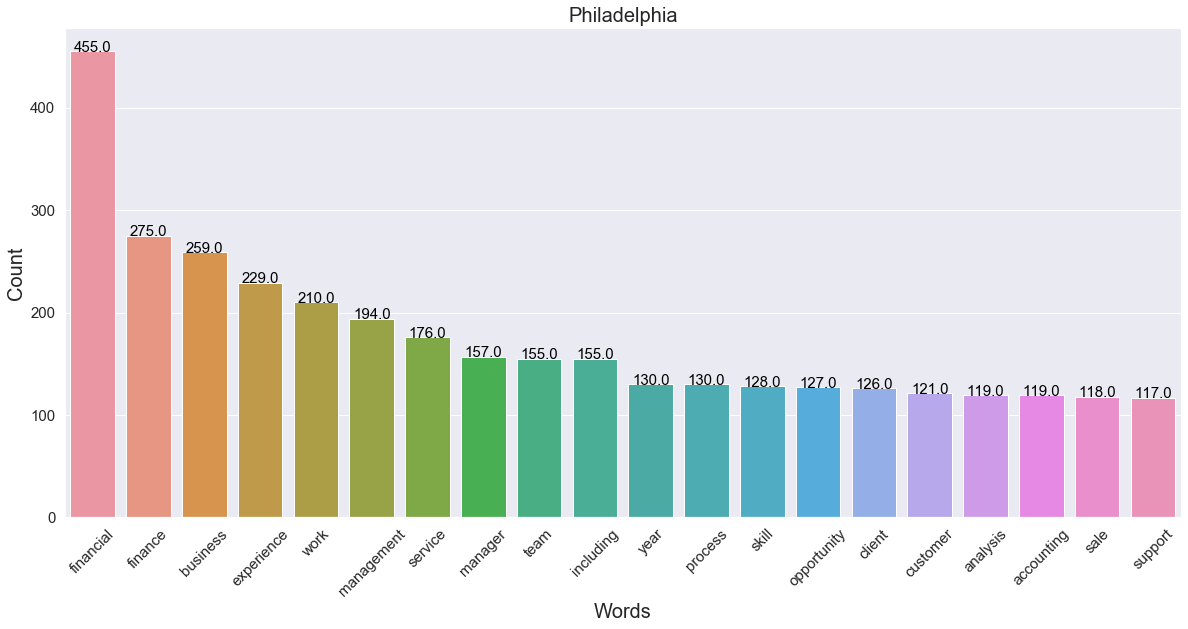

               ReviewText  count
0       equal opportunity     37
1         year experience     36
2       financial service     35
3    opportunity employer     32
4     communication skill     27
5              fast paced     25
6     financial reporting     24
7      sexual orientation     24
8        director finance     24
9   financial information     23
10         pre employment     23
11        national origin     22
12        bachelor degree     22
13      finance insurance     21
14          federal state     21
15       policy procedure     21
16     automotive finance     21
17              type full     20
18        gender identity     20
19          annual budget     20


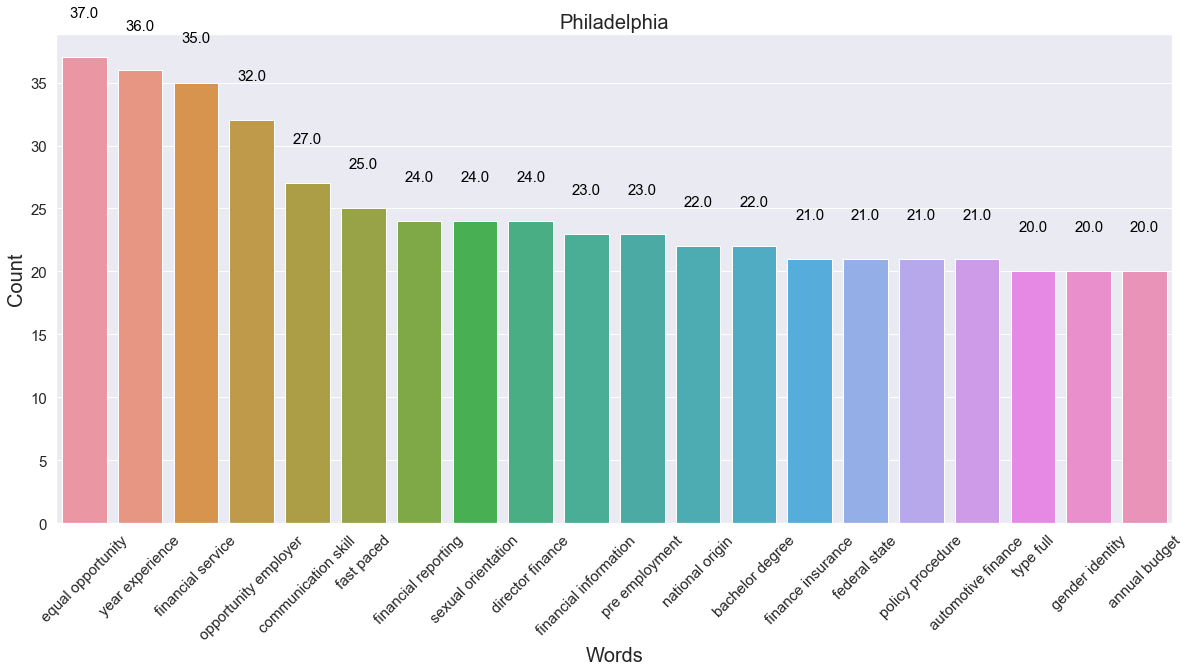

https://www.indeed.com/m/jobs?q=finance+manager&l=Houston
     ReviewText  count
0     financial    558
1       finance    486
2      business    470
3    experience    433
4          work    348
5    management    336
6          team    298
7        client    287
8       service    270
9   opportunity    236
10    including    224
11      process    219
12        skill    210
13      project    208
14   accounting    204
15      support    202
16     deloitte    196
17         year    194
18     customer    181
19  development    180


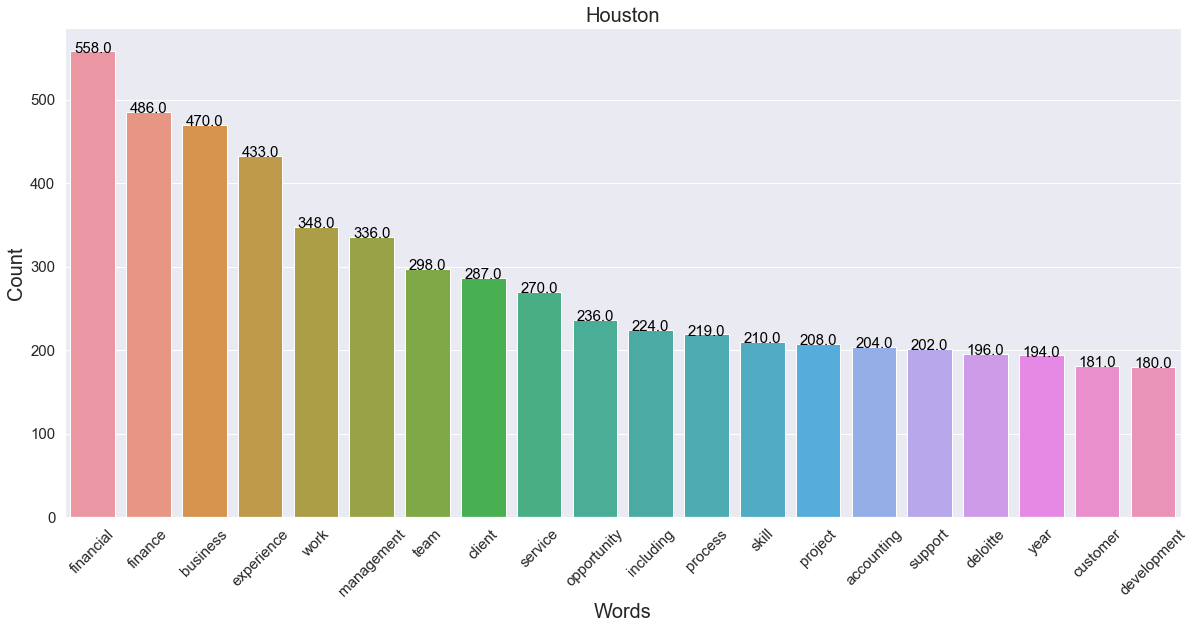

              ReviewText  count
0        year experience     64
1    communication skill     39
2        national origin     38
3     sexual orientation     37
4          revenue cycle     36
5        bachelor degree     35
6      equal opportunity     35
7      financial service     35
8          skill ability     34
9   opportunity employer     32
10    project management     31
11   financial reporting     31
12      opportunity help     30
13       gender identity     30
14            race color     29
15  financial management     28
16     degree accounting     28
17        veteran status     28
18        without regard     27
19      customer service     27


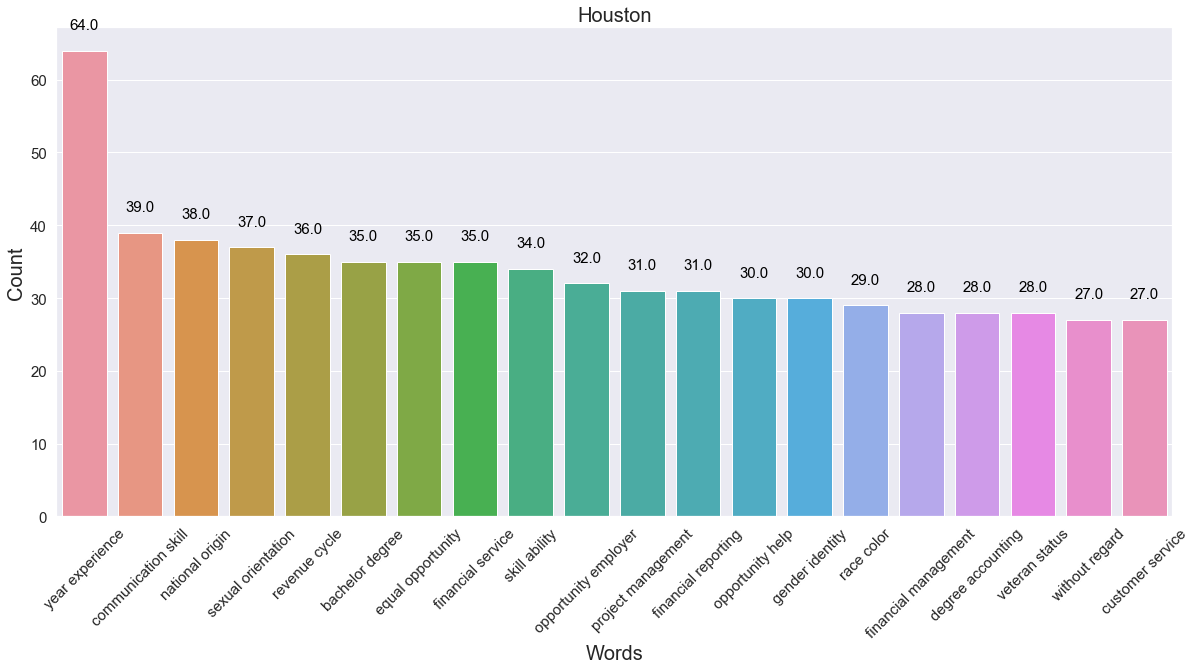

In [37]:
items = ['Washington%2C+DC','New+York', 'San+Francisco', 'Chicago', 'Philadelphia', 'Houston'] 
url_test = 'https://www.indeed.com/m/jobs?q=finance+manager&l={}'
df_all = pd.DataFrame([])
for i in items:
    url = url_test.format(i)
    print(url)
    df3 = getlink(url,10)
    if i == 'Washington%2C+DC':
        single_word(df3, 'Washington DC')
        bi_word(df3, 'Washington DC')
    elif i == 'New+York':
        single_word(df3, 'New York')
        bi_word(df3, 'New York')
    elif i == 'San+Francisco':
        single_word(df3, 'San Francisco')
        bi_word(df3, 'San Francisco')
    else:
        single_word(df3, i)
        bi_word(df3, i)
    df_all = df_all.append(df3)

### All Cities

     ReviewText  count
0     financial   3703
1      business   2565
2       finance   2472
3    experience   2233
4          work   1895
5          team   1893
6    management   1772
7       service   1358
8        client   1331
9    accounting   1273
10        skill   1220
11      process   1193
12    including   1158
13         year   1152
14  opportunity   1132
15      manager   1130
16     analysis   1100
17      support   1092
18      ability   1008
19      project    980


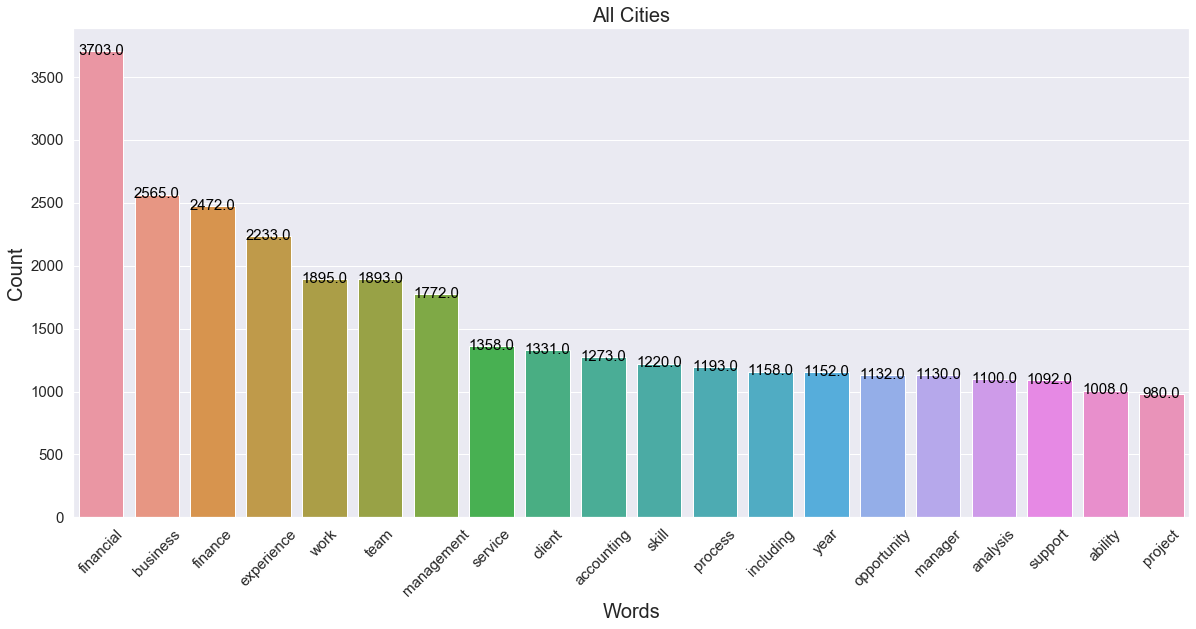

In [46]:
single_word(df_all, 'All Cities')

              ReviewText  count
0        year experience    304
1      equal opportunity    250
2      financial service    224
3    communication skill    213
4        national origin    211
5     sexual orientation    211
6   opportunity employer    204
7    financial reporting    192
8   financial management    183
9       financial center    180
10       bachelor degree    180
11            fast paced    179
12    financial planning    178
13         skill ability    178
14       gender identity    177
15      policy procedure    173
16       finance manager    172
17        veteran status    171
18            race color    163
19                ad hoc    159


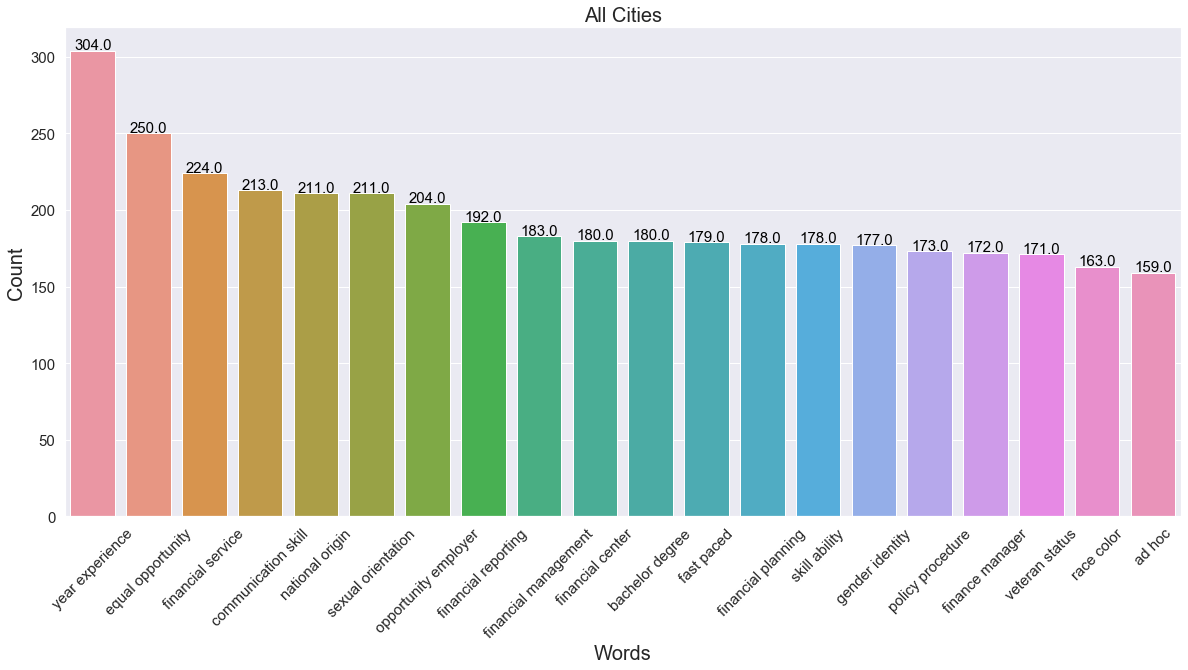

In [47]:
bi_word(df_all, 'All Cities')